<a href="https://colab.research.google.com/github/AleGdSantos/AleGdSantos/blob/main/I2A2_Redu%C3%A7%C3%A3o_de_Dimensionalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h3>  <a href="https://www.kaggle.com/competitions/i2a2-classify-monkey-gender-v2/data">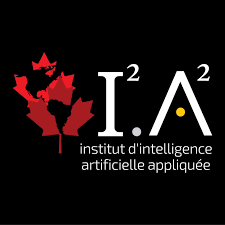 &nbsp;&nbsp;Projeto 4 - Redução de Dimensionalidade

**Alunos:**



  <td>
    <a target="_blank" href="https://www.linkedin.com/in/alessandra-santos-17017965/">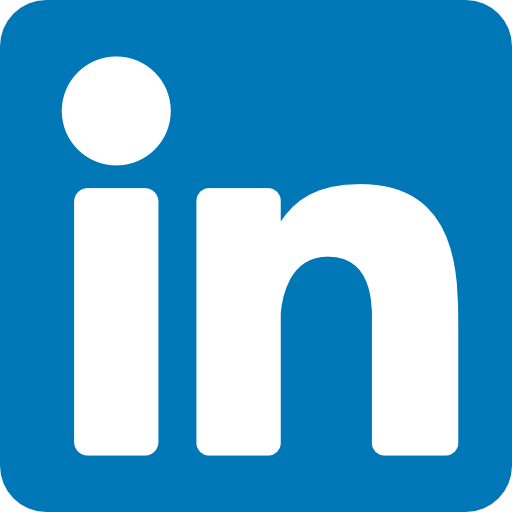Alessandra Santos</a>
  </td>
    <td>
    <a target="_blank" href="https://www.linkedin.com/in/rosemeri-borges/">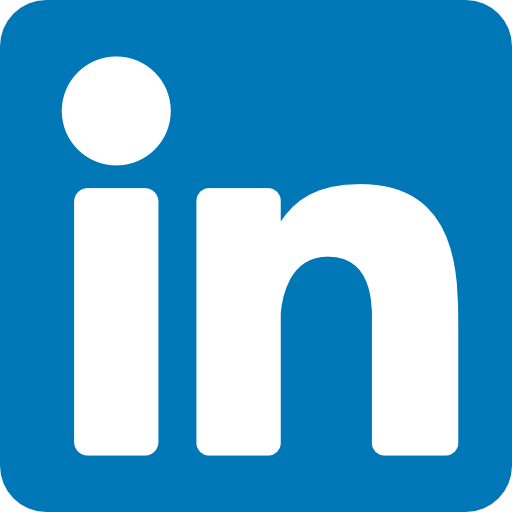Rose Borges</a>
  </td>
   <td>
    <a target="_blank" href="https://www.linkedin.com/in/marcelo-felipe-41248789/">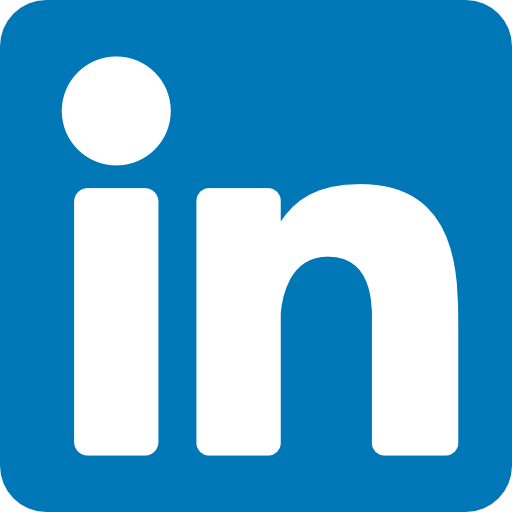Marcelo Felipe</a>
  </td>
    <td>
    <a target="_blank" href="https://www.linkedin.com/in/kauan-casimiro-silva-991621230/">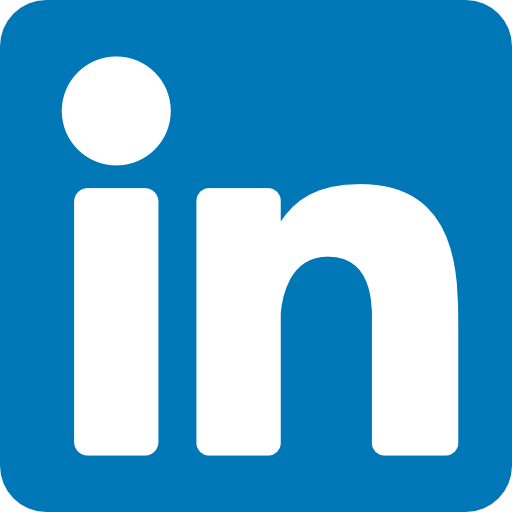Kauan Silva</a>
  </td>

**Prof.Celso Azevedo**

## Importanções e ajustes para a apresentação


In [ ]:
#Numpy: operações matemáticas
import numpy as np
#Pandas:funções para manipulação e análise de dados.
import pandas as pd
#Matplotlib, plotly e Seaborn: Plotagem de gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#Sklearn: funções de aprendizagem de máquina
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import time
from sklearn.decomposition import PCA, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Tensor FLow e Keras
import tensorflow as tf
from tensorflow import keras

**Iris Dataset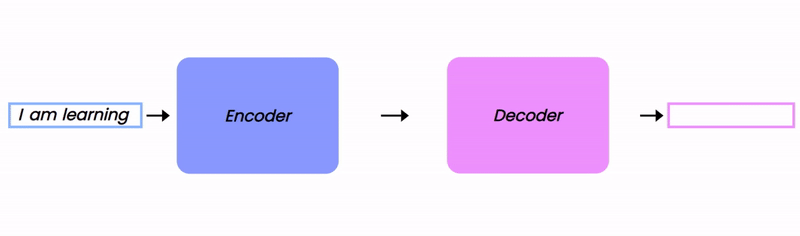**

In [ ]:
from sklearn import datasets
# Carregando o Iris dataset
iris = sns.load_dataset("iris")

X_iris = iris.drop('species', axis=1)
y_iris = iris['species'].copy()
# Aplicando a função factorize para converter as labels em valores numéricos
y_iris_numeric, mapping = pd.factorize(y_iris)
# Dividindo o conjunto de dados em treino e teste
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)


**MNIST dataset**

In [ ]:
mnist = keras.datasets.mnist
# Carregando o conjunto de dados MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
# Redimensionando as imagens para um vetor unidimensional
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

In [ ]:
subset_size = 10000
X_subset, y_subset = X_train[:subset_size], y_train[:subset_size]

**Outros**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
#df_spam = pd.read_csv("/content/drive/MyDrive/Redução de Dimensionalidade/spam.csv")
#df_test = pd.read_csv("/content/test.csv")
# X_spam = df_spam.drop('class', axis=1)
# y_spam = df_spam['class'].copy()

###Funções

In [ ]:
# Função para visualizar os resultados
def plot_resultados(X, title,ly):
    plt.scatter(X[:, 0], X[:, 1], c=ly, edgecolor='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

In [ ]:
# Função para avaliar o desempenho do modelo
def evaluate_model(model, X_test, y_test):
    start_time = time.time()
    y_pred = model.predict(X_test)
    end_time = time.time()
    time_elapsed = end_time - start_time
    accuracy = accuracy_score(y_test, y_pred)
    return time_elapsed, accuracy

#**1: Introdução**

##**MNIST (Modified National Institute of Standards and Technology):**

O MNIST é um conjunto de dados amplamente utilizado na comunidade de aprendizado de máquina e visão computacional. Ele consiste em um conjunto de 70.000 imagens de dígitos escritos à mão, cada uma em escala de cinza e com resolução de 28x28 pixels. Os dígitos variam de 0 a 9, representando um problema de classificação de 10 classes.

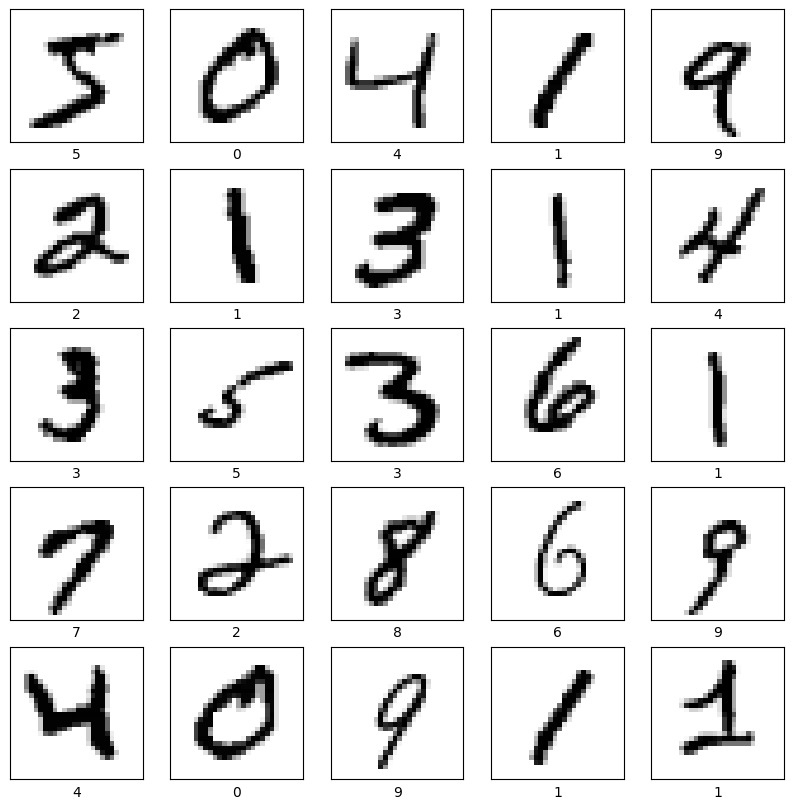

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [ ]:
# Treinamento sem redução de dimensionalidade
mlp_original = MLPClassifier(random_state=42)
mlp_original.fit(X_train, y_train)

# Avaliação do desempenho sem redução de dimensionalidade
time_original, accuracy_original = evaluate_model(mlp_original, X_test, y_test)

# Treinamento com redução de dimensionalidade (PCA)
pca = PCA(n_components=150)  # Número arbitrário de componentes principais
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

mlp_pca = MLPClassifier(random_state=42)
mlp_pca.fit(X_train_pca, y_train)

# Avaliação do desempenho com redução de dimensionalidade (PCA)
time_pca, accuracy_pca = evaluate_model(mlp_pca, X_test_pca, y_test)

# Treinamento com redução de dimensionalidade (LDA)
lda = LinearDiscriminantAnalysis(n_components=9)  # Número arbitrário de discriminantes lineares
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

mlp_lda = MLPClassifier(random_state=42)
mlp_lda.fit(X_train_lda, y_train)

# Avaliação do desempenho com redução de dimensionalidade (LDA)
time_lda, accuracy_lda = evaluate_model(mlp_lda, X_test_lda, y_test)

# Resultados
print(f"Tempo de Treinamento sem Redução de Dimensionalidade: {time_original:.2f} segundos")
print(f"Acurácia sem Redução de Dimensionalidade: {accuracy_original:.2f}")

print("\n---\n")

print(f"Tempo de Treinamento com Redução de Dimensionalidade (PCA): {time_pca:.2f} segundos")
print(f"Acurácia com Redução de Dimensionalidade (PCA): {accuracy_pca:.2f}")

print("\n---\n")

print(f"Tempo de Treinamento com Redução de Dimensionalidade (LDA): {time_lda:.2f} segundos")
print(f"Acurácia com Redução de Dimensionalidade (LDA): {accuracy_lda:.2f}")


Tempo de Treinamento sem Redução de Dimensionalidade: 0.24 segundos
Acurácia sem Redução de Dimensionalidade: 0.96

---

Tempo de Treinamento com Redução de Dimensionalidade (PCA): 0.07 segundos
Acurácia com Redução de Dimensionalidade (PCA): 0.97

---

Tempo de Treinamento com Redução de Dimensionalidade (LDA): 0.03 segundos
Acurácia com Redução de Dimensionalidade (LDA): 0.92


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**Problema de Múltiplas Dimensões no MNIST:**

Cada imagem no conjunto de dados MNIST é representada por uma matriz bidimensional de pixels, totalizando **28 * 28 = 784 dimensões**.

In [ ]:
X_train.shape # 28x28 pixels = 784 dimensões

(48000, 784)

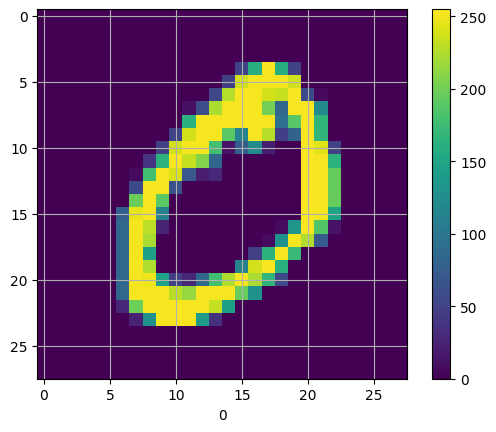

In [ ]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()
plt.grid(True)
plt.xlabel(y_train[1])
plt.show()

Lidar com dados de alta dimensionalidade pode trazer desafios, como aumento da **complexidade computacional**, demanda de grandes conjuntos de dados e a propensão a sobreajuste (**overfitting**).

A alta dimensionalidade também pode tornar difícil visualizar e interpretar os dados. Além disso, **nem todas as dimensões** podem ser **igualmente informativas** para a tarefa em questão. Portanto, é desejável encontrar maneiras de **reduzir a dimensionalidade**, mantendo a maior parte da informação relevante.

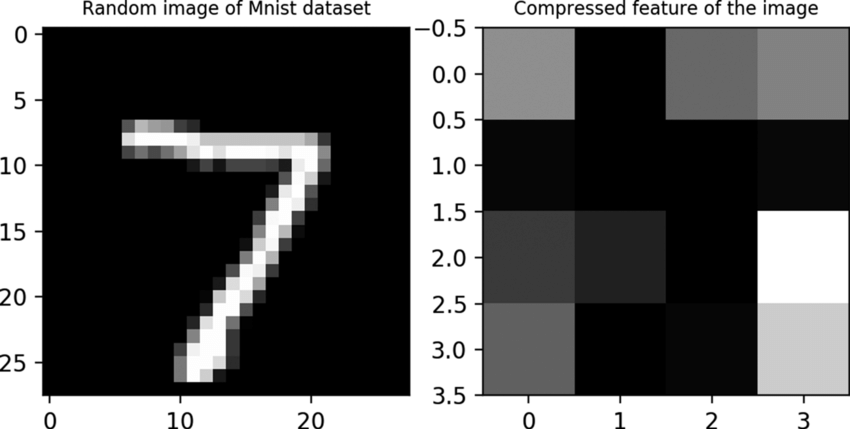

# **2: Redução de Dimensionalidade**

Vivemos em uma era em que o volume de dados cresce exponencialmente, impulsionado pelo desenvolvimento de grandes bases de dados, popularmente conhecidas como **Big Data**. Nesse cenário, muitas vezes nos deparamos com conjuntos de dados que abraçam uma **quantidade exorbitante de variáveis**, desafiando não apenas a eficiência computacional, mas também a capacidade de extrair **insights significativos**.


A **Redução de Dimensionalidade** emerge como uma solução estratégica, permitindo a **eficiente representação** dos dados complexos, a **preservação de informações cruciais** e, consequentemente, a superação dos desafios impostos pela **maldição da dimensionalidade**.

### **2.1 Maldição da Dimensionalidade**

A maldição da dimensionalidade refere-se aos desafios que surgem quando lidamos com conjuntos de dados em espaços de **alta dimensionalidade**. Com o aumento do número de features, o espaço de características torna-se vasto, resultando em uma escassez relativa de dados. Isso pode levar a problemas como a **dispersão dos dados**, aumento na **complexidade computacional**, necessidade de mais dados para manter a representatividade e **dificuldade na identificação de padrões** significativos.

A Redução de Dimensionalidade entra em cena para simplificar esse emaranhado, identificando correlações entre características. Essa técnica nos permite reduzir a complexidade, transformando um problema tridimensional em algo mais manejável, sem perder a riqueza dos dados.

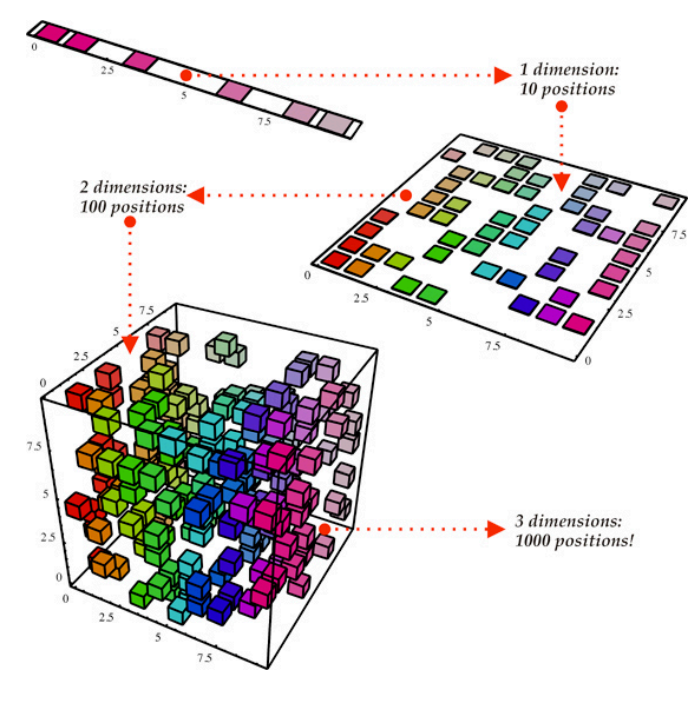

#**Técnicas Lineares**

A redução de dimensionalidade linear é uma técnica que visa reduzir o número de variáveis ou características em um conjunto de dados enquanto mantém o máximo possível da sua informação original. Essa abordagem é linear porque as transformações aplicadas são operações lineares, como projeções e combinações lineares das características originais.

##**3: Análise de Componentes Principais (PCA)**

A Análise de Componentes Principais (PCA) é uma técnica linear poderosa que se destaca na transformação de dados para um novo conjunto de features, chamados de componentes principais. Essa abordagem é particularmente útil para a redução de dimensionalidade, eliminação de correlações entre features e visualização de dados em espaços de menor dimensão. No entanto, é crucial ter em mente que o PCA é um método não supervisionado, o que significa que não leva em consideração as informações de classe durante o processo de transformação.


###**Métodos tradicionais**

**PCA Normal:**

O PCA normal é a implementação padrão do PCA. Ele calcula os autovetores e autovalores da matriz de covariância dos dados para encontrar os componentes principais.

**Aplicação:**

Use quando o **conjunto de dados** se encontra na memória e **não é muito grande**.
Adequado para conjuntos de dados com até algumas dezenas de milhares de amostras.

In [ ]:
# Importa as funções de PCA da biblioteca sklearn
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA

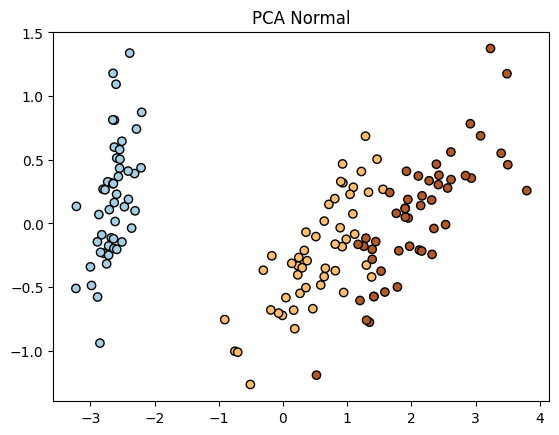

In [ ]:
# Aplicando PCA normal
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_iris)
plot_resultados(X_pca, "PCA Normal",y_iris_numeric)

O gráfico mostra a projeção dos dados nos dois primeiros componentes principais.
Cada ponto representa uma amostra.
A dispersão dos pontos reflete a variabilidade dos dados no novo espaço.

**PCA Incremental:**

Divide o conjunto de dados em lotes menores (**batch_size**) e calcula os componentes principais iterativamente.
Ideal para conjuntos de dados muito grandes que não cabem na memória.

In [ ]:
# Importa as funções de PCA da biblioteca sklearn
from sklearn.decomposition import IncrementalPCA

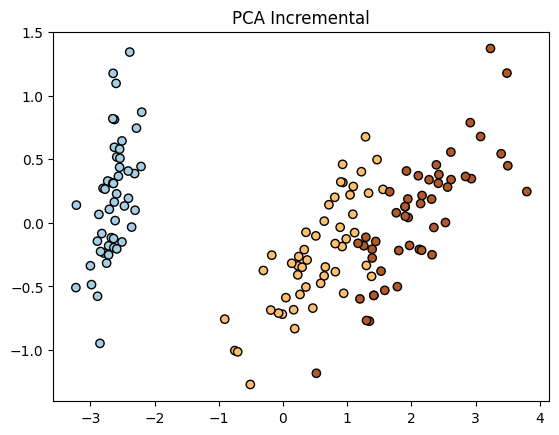

In [ ]:
# Aplicando PCA incremental
ipca = IncrementalPCA(n_components=2, batch_size=10)
X_ipca = ipca.fit_transform(X_iris)
plot_resultados(X_ipca, "PCA Incremental",y_iris_numeric)

Similar ao PCA normal, mas pode ser útil para conjuntos de dados muito grandes, já que é calculado em lotes.
A vantagem aqui é a eficiência computacional em relação ao PCA normal.


**PCA Randomizado:**

Utiliza técnicas de aproximação estocástica para calcular os componentes principais de forma mais eficiente.
Eficiente para conjuntos de dados grandes e quando uma aproximação é aceitável.

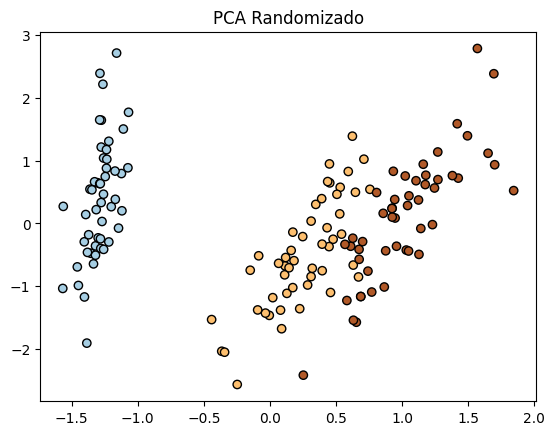

In [ ]:
# Aplicando PCA randomizado
rpca = PCA(n_components=3, svd_solver='randomized', whiten=True)
X_rpca = rpca.fit_transform(X_iris)
plot_resultados(X_rpca, "PCA Randomizado",y_iris_numeric)

Similar ao PCA normal, mas com uma abordagem randomizada para acelerar o processo de cálculo.
Os pontos devem formar uma dispersão semelhante à do PCA normal, mas o método pode ser mais rápido.

###**Extensão não linear**

**Kernel PCA:**

Kernel PCA é uma extensão **não linear do PCA** que utiliza funções de kernel para mapear os dados para espaços de características de alta dimensão antes de realizar a redução de dimensionalidade.
Útil quando os **dados não são linearmente separáveis**.

In [ ]:
# Importa as funções de PCA da biblioteca sklearn
from sklearn.decomposition import KernelPCA

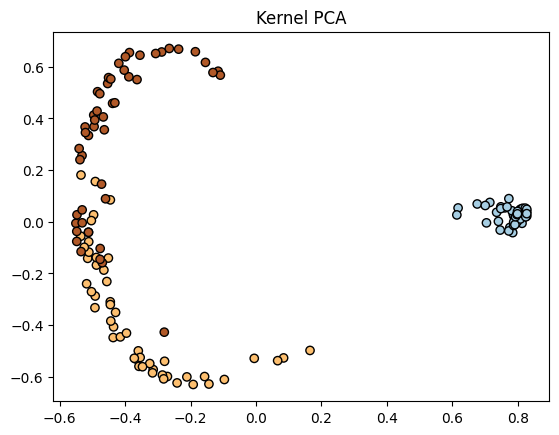

In [ ]:
# Aplicando Kernel PCA
kpca = KernelPCA(n_components=2, kernel='rbf')
X_kpca = kpca.fit_transform(X_iris)
plot_resultados(X_kpca, "Kernel PCA",y_iris_numeric)

O gráfico mostra a projeção em um espaço de maior dimensão, onde padrões não lineares podem ser mais facilmente separados.
Os clusters podem ter formas mais complexas do que no PCA normal.

###**Como Selecionar o número correto de dimensões?**



In [ ]:
# Normalizar os dados para média zero e variância unitária (importante para PCA)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Aplicar PCA após "aplanar" as imagens
n_pixels = X_train.shape[1]  # Número de pixels em cada imagem
X_train_flattened = X_train.reshape(-1, n_pixels)
X_test_flattened = X_test.reshape(-1, n_pixels)


In [ ]:
# Aplicar PCA
pca_MNIST = PCA()
pca_MNIST.fit(X_train)

PCA()


**Análise da Contribuição Cumulativa:**

Avaliar a contribuição cumulativa da variância explicada para cada número de componentes. Escolher um número de dimensões que capture uma porcentagem aceitável da variância total.

In [ ]:
# Calcula a variância explicada (explained variance) para cada componente principal
explained_variance = pca_MNIST.explained_variance_ratio_

# Cada valor nesta sequência indica quanto da variabilidade total nos dados é explicado por um componente principal específico.
pca_MNIST.explained_variance_ratio_.cumsum()

array([0.09732774, 0.16804573, 0.23000637, 0.28386469, 0.33253919,
       0.37571377, 0.40845653, 0.43726847, 0.46491276, 0.48848598,
       0.50960438, 0.52971467, 0.54685114, 0.56379523, 0.57959618,
       0.59442315, 0.60768734, 0.62053049, 0.63238078, 0.64384795,
       0.65449698, 0.66452924, 0.67402585, 0.68317358, 0.6920501 ,
       0.70046262, 0.70859526, 0.71645206, 0.72389477, 0.73077154,
       0.7373478 , 0.74379264, 0.74980232, 0.75566323, 0.76137273,
       0.76681621, 0.77189537, 0.77676032, 0.78157324, 0.78630484,
       0.79086106, 0.79530815, 0.79950986, 0.80350536, 0.80734582,
       0.81108719, 0.81471291, 0.81824391, 0.82163026, 0.82484601,
       0.82804459, 0.8311725 , 0.8341551 , 0.83703818, 0.83988805,
       0.84259877, 0.84529062, 0.84786264, 0.85039473, 0.85284853,
       0.85524569, 0.85763069, 0.85993453, 0.86215267, 0.86428997,
       0.86636194, 0.86839751, 0.87036118, 0.87228468, 0.87416878,
       0.8760432 , 0.87784795, 0.8796174 , 0.88135219, 0.88300


**Método do Cotovelo (Elbow Method):**

Plotar a variância explicada em função do número de componentes. O ponto onde a curva começa a nivelar é chamado de "cotovelo". Esse é um indicativo do número ideal de dimensões.

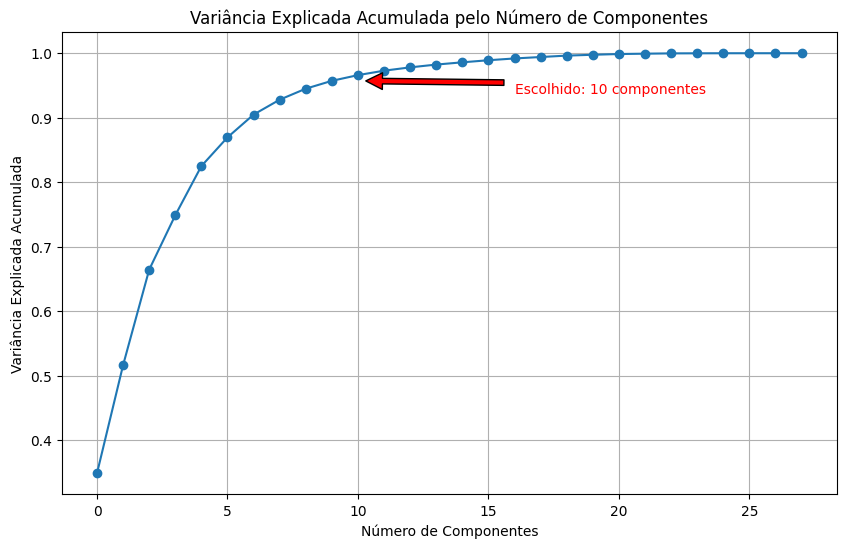

In [ ]:
# Visualizar a variância explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_MNIST.explained_variance_ratio_),marker='o')
plt.title('Variância Explicada Acumulada pelo Número de Componentes')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.grid(True)

# Escolher o número de componentes com base na análise do gráfico
num_components = 10

# Adicionar uma seta para indicar o número escolhido de componentes
plt.annotate(f'Escolhido: {num_components} componentes',
             xy=(num_components, np.cumsum(pca_MNIST.explained_variance_ratio_)[num_components-1]),
             xytext=(num_components + 6, np.cumsum(pca_MNIST.explained_variance_ratio_)[num_components-1] - 0.02),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=10, color='red')

plt.show()

**Validação Cruzada (Cross-Validation):**

Realizar a validação cruzada para avaliar o desempenho do modelo para diferentes números de dimensões. Escolher o número que fornece o melhor desempenho médio durante a validação cruzada.

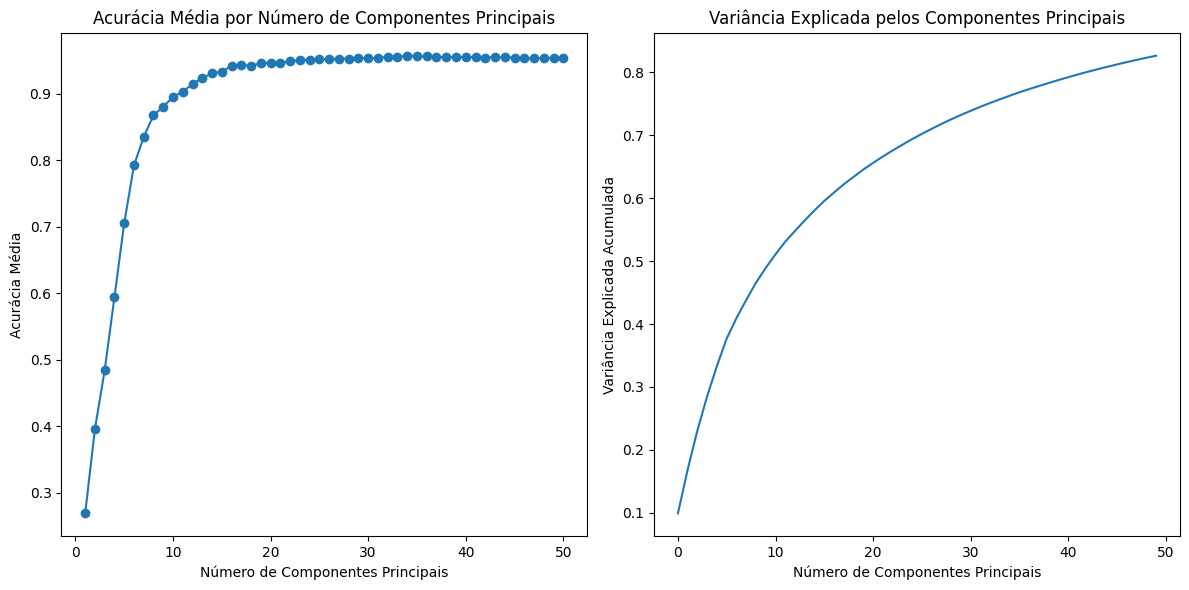

In [ ]:
# Número máximo de componentes principais
max_components = 50

# Inicializando um classificador (por exemplo, k-vizinhos mais próximos)
knn = KNeighborsClassifier(n_neighbors=3)

# Inicializando listas para armazenar as acurácias médias por número de componentes
mean_accuracies = []

# Testando diferentes números de componentes
for n_components in range(1, max_components + 1):
    # Aplicando o PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_subset)

    # Realizando a validação cruzada
    cv_scores = cross_val_score(knn, X_pca, y_subset, cv=5, scoring='accuracy')

    # Armazenando a acurácia média
    mean_accuracies.append(np.mean(cv_scores))

# Visualizando a variância explicada pelos componentes principais
plt.figure(figsize=(12, 6))

# Gráfico de linha para as acurácias médias
plt.subplot(1, 2, 1)
plt.plot(range(1, max_components + 1), mean_accuracies, marker='o')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Acurácia Média')
plt.title('Acurácia Média por Número de Componentes Principais')

# Gráfico de linha para a variância explicada acumulada
plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada pelos Componentes Principais')

plt.tight_layout()
plt.show()

O gráfico à esquerda mostra como a **acurácia média** varia com o número de **componentes principais**. O ponto onde a acurácia atinge um **platô** pode ser considerado como o **número ideal de componentes**.

O gráfico à direita mostra a **variância** explicada acumulada pelos componentes principais, que também é útil para determinar o número adequado de componentes.

##**4: Análise Discriminante Linear(LDA):**

A Análise Discriminante Linear (LDA) é uma técnica poderosa de aprendizado supervisionado que se destina a maximizar a separação entre classes em dados multivariados. Ao contrário do PCA, o LDA leva em consideração as informações de classe, tornando-se uma escolha eficaz para tarefas de classificação e discriminação entre grupos.

**Tipos de LDA:**

**LDA Normal:**

A implementação padrão da LDA, que calcula as projeções discriminantes lineares.
Ideal para tarefas de classificação onde a separação entre classes é crucial.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

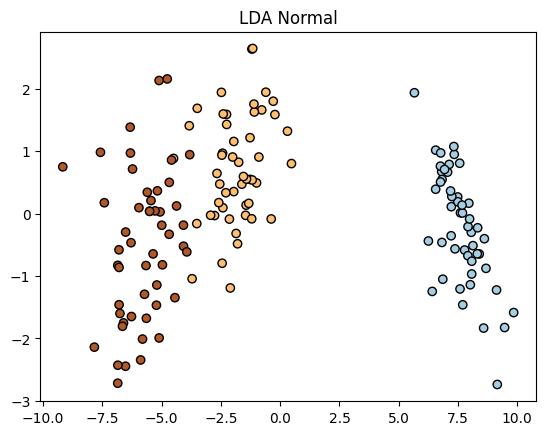

In [ ]:
# LDA Normal
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_iris, y_iris_numeric)
plot_resultados(X_lda, "LDA Normal",y_iris_numeric)

**QDA (Análise Discriminante Quadrática):**

Uma extensão da LDA que permite diferentes matrizes de covariância para cada classe.
Útil quando as classes têm covariâncias distintas.

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

Esse exemplo mostra como treinar um modelo QDA no conjunto de dados Iris e avaliar sua precisão. A QDA é útil em situações onde as covariâncias diferentes entre classes podem resultar em um melhor ajuste aos dados.

In [ ]:
# QDA
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_pred = qda.fit(X_iris, y_iris).predict(X_test_iris)
# Avaliando a precisão do modelo
accuracy = accuracy_score(y_test_iris, y_pred)
print(f'Acurácia: {accuracy:.2f}')

Acurácia: 1.00


Ao contrário da LDA, que assume que todas as classes compartilham a mesma matriz de covariância, a QDA permite que cada classe tenha sua própria matriz de covariância. Isso a torna mais flexível em relação à forma das distribuições de probabilidade.

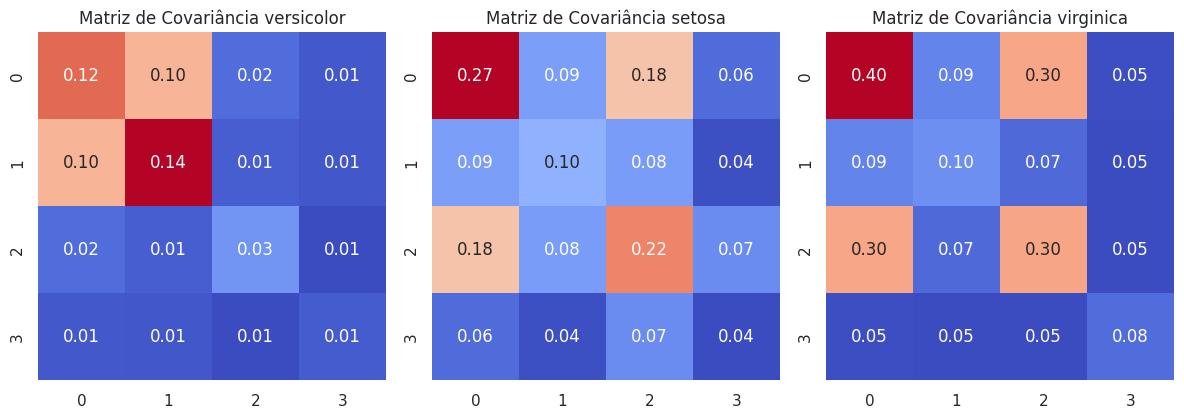

In [ ]:
# Mapeando os índices das classes para os nomes desejados
class_names = {0: 'versicolor', 1: 'setosa', 2: 'virginica'}

# Configurando o estilo do mapa de calor
sns.set(style="white")

# Plotando as matrizes de covariância
plt.figure(figsize=(12, 8))
for i, cov in enumerate(covariances):
    plt.subplot(1, len(covariances), i + 1)
    sns.heatmap(cov, annot=True, cmap="coolwarm", cbar=False, square=True, fmt=".2f")
    plt.title(f"Matriz de Covariância {class_names[i]}")

plt.tight_layout()
plt.show()

Este código gera um mapa de calor para cada matriz de covariância, proporcionando uma representação visual mais clara das relações entre as variáveis em cada classe.

###**Extensão não linear**

**LDA com Kernel:**

O Kernel LDA aplica o truque do kernel para mapear os dados em um espaço de maior dimensão antes de realizar a LDA.
Pode capturar relações não lineares entre classes.

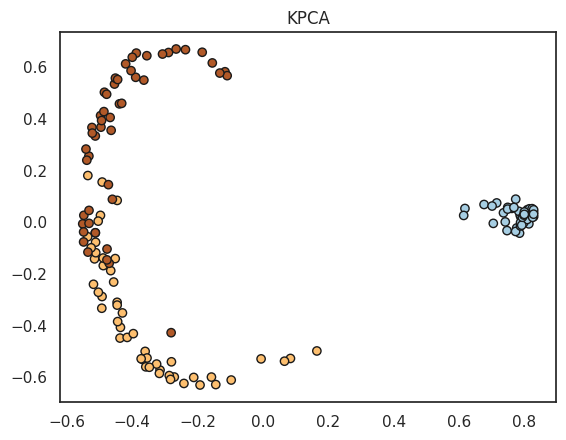

In [ ]:
# Aplicando LDA com Kernel (rbf é o kernel gaussiano)
kpca = KernelPCA(kernel='rbf', n_components=2)
X_kpca = kpca.fit_transform(X_iris)

# Aplicando a LDA nos dados transformados pelo Kernel PCA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_kpca, y_iris_numeric)
plot_resultados(X_kpca, "KPCA", y_iris_numeric)

###**Como Selecionar o número certo de dimensões?**

Selecionar o número de dimensões determinado pela quantidade de classes menos um (c-1).

Para o caso do Iris dataset temos **3 classes**, portanto, o número de dimensões aplicado seria igual a **2**.

In [ ]:
np.unique(y_iris)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Para o caso do MNIST dataset temos **10 classes**, portanto, o número de dimensões aplicado seria igual a **9**.

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#**Técnicas Não Linear**

A redução não linear de dimensionalidade é uma técnica utilizada para representar dados complexos e de alta dimensionalidade em espaços de menor dimensão, preservando relações não lineares entre as variáveis. Diferentemente dos métodos lineares, como o PCA (Principal Component Analysis), que assume relações lineares entre variáveis, métodos não lineares são capazes de capturar padrões mais intrincados e complexos.

##**T-SNE (t-Distributed Stochastic Neighbor Embedding):**

T-SNE é uma técnica **não linear** amplamente utilizada para visualização de dados em d**uas ou três dimensões**. Ele preserva as relações de proximidade entre os pontos no espaço original, tornando-o útil para dados que exibem estruturas complexas e não lineares.
T-SNE é frequentemente aplicado em tarefas de visualização de clusters e similaridades entre pontos.

In [ ]:
from sklearn.manifold import TSNE

**Aplicando o T-SNE no dataset Iris**

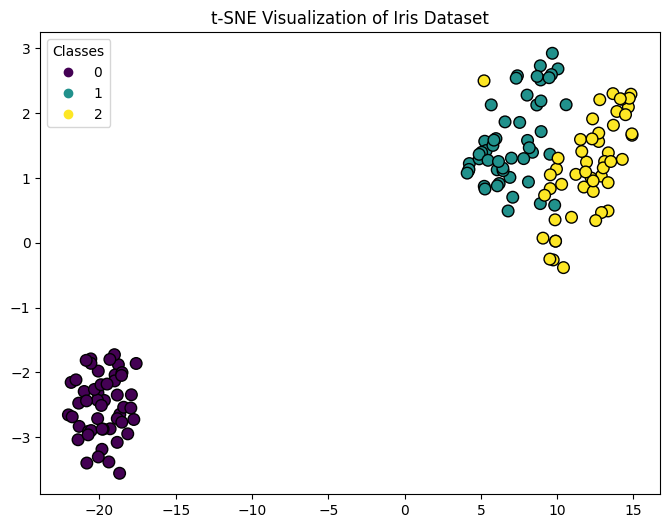

In [ ]:
# Aplicando t-SNE
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
X_tsne = tsne.fit_transform(X_iris)
# Plotando o resultado
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_iris_numeric, cmap='viridis', edgecolor='k', s=70)
plt.title('t-SNE Visualization of Iris Dataset')
plt.legend(*scatter.legend_elements(), title='Classes')
plt.show()

**Aplicando o T-SNE no dataset MNIST**

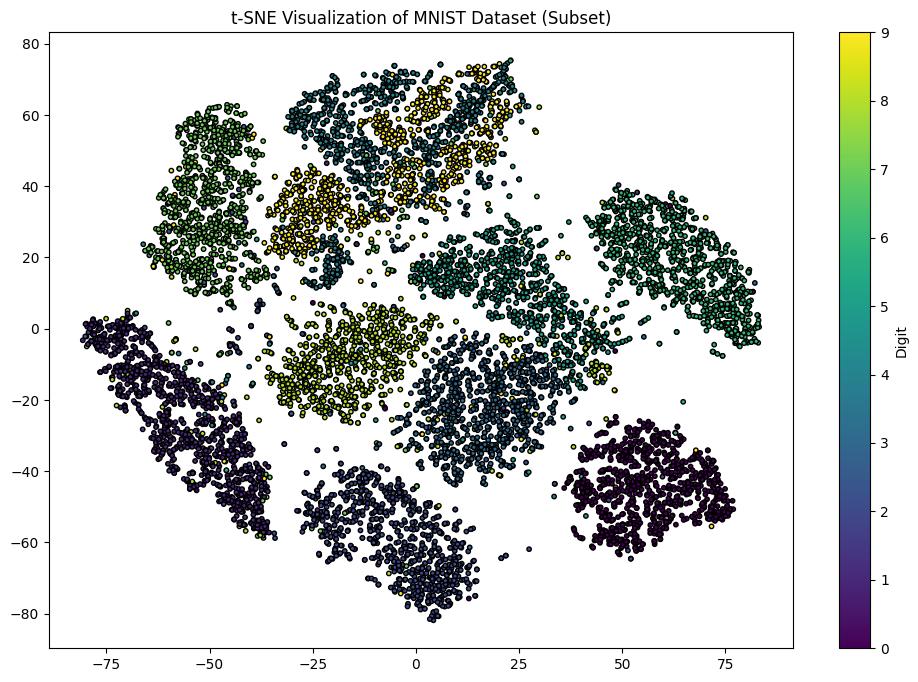

In [ ]:
# Aplicando t-SNE
tsne = TSNE(n_components=2, perplexity=30,random_state=42)
X_tsne = tsne.fit_transform(X_subset)

# Plotando o resultado
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_subset, cmap='viridis', edgecolor='k', s=10)
plt.title('t-SNE Visualization of MNIST Dataset (Subset)')
plt.colorbar(scatter, label='Digit')
plt.show()

Determinar o número de componentes (dimensões) no **t-SNE** não é uma escolha direta como no **PCA**, onde você pode escolher o número de componentes com base na variância explicada. No **t-SNE**, a principal consideração é o parâmetro chamado "**perplexity**".

A perplexidade é um **hiperparâmetro** crítico no **t-SNE**, e ela controla o equilíbrio entre preservar a estrutura local e global dos dados. Em geral, escolher a perplexidade envolve um pouco de **tentativa e erro**.

##**LLE (Locally Linear Embedding):**

LLE é uma técnica **não linear** que tenta preservar as relações de vizinhança local entre os pontos. Ela mapeia cada ponto para um espaço de menor dimensão enquanto preserva as propriedades locais da distribuição dos dados.
LLE é eficaz em preservar estruturas não lineares, mas pode ser sensível a parâmetros.

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

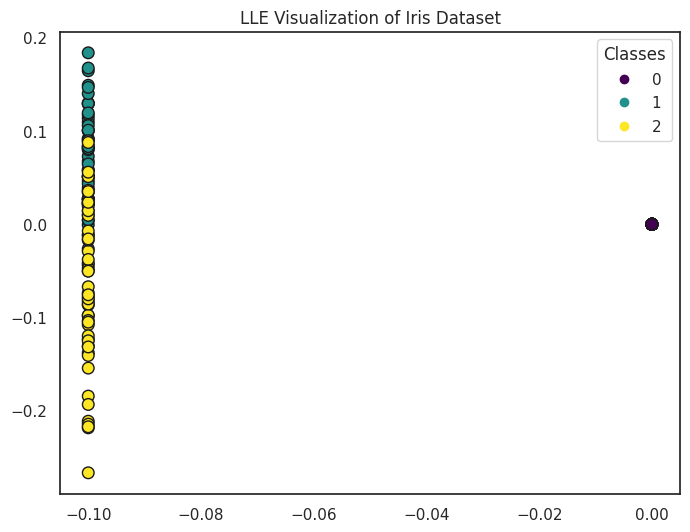

In [ ]:
# Aplicando LLE
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_lle = lle.fit_transform(X_iris)

# Plotando o resultado
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y_iris_numeric, cmap='viridis', edgecolor='k', s=70)
plt.title('LLE Visualization of Iris Dataset')
plt.legend(*scatter.legend_elements(), title='Classes')
plt.show()

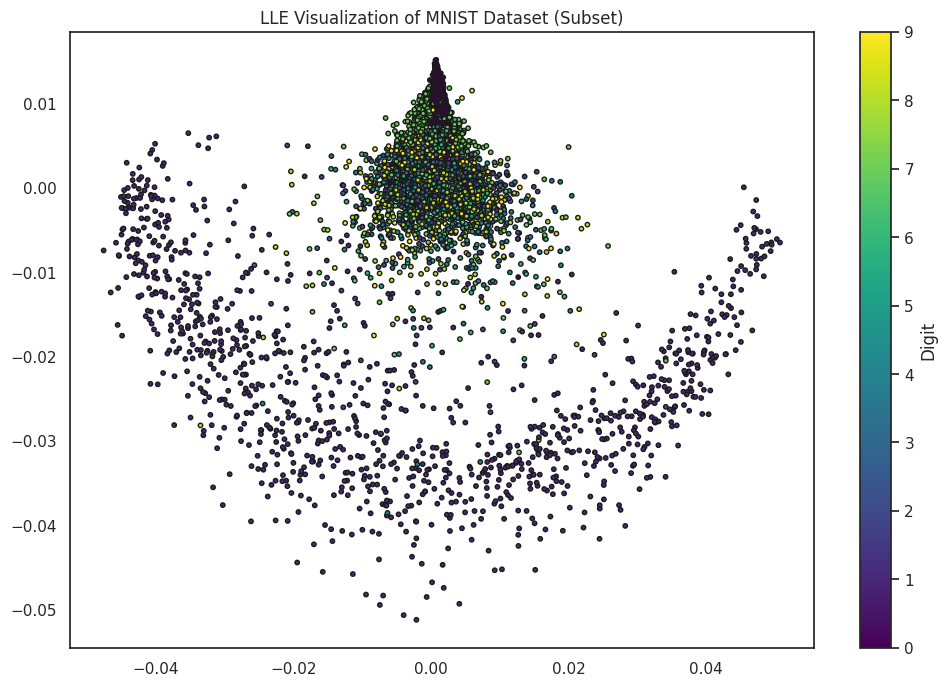

In [ ]:
# Aplicando LLE
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=30, random_state=42)
X_lle = lle.fit_transform(X_subset)

# Plotando o resultado
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y_subset, cmap='viridis', edgecolor='k', s=10)
plt.title('LLE Visualization of MNIST Dataset (Subset)')
plt.colorbar(scatter, label='Digit')
plt.show()

##**Autoencoders:**

Autoencoders são **redes neurais especializadas** em aprendizado não supervisionado. Eles consistem em uma arquitetura de codificador e decodificador, sendo treinados para reproduzir a entrada original na camada de saída.
A camada intermediária (representação latente) do autoencoder serve como uma versão de menor dimensionalidade dos dados originais.


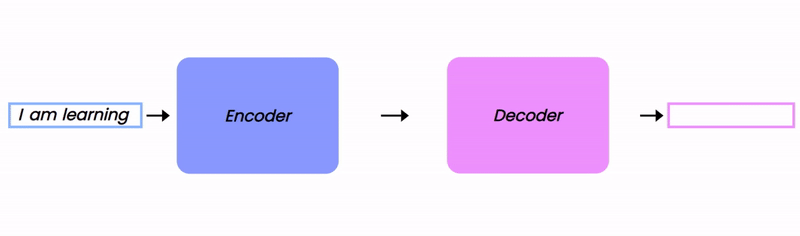

In [ ]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

5/5 [==============================] - 0s 5ms/step


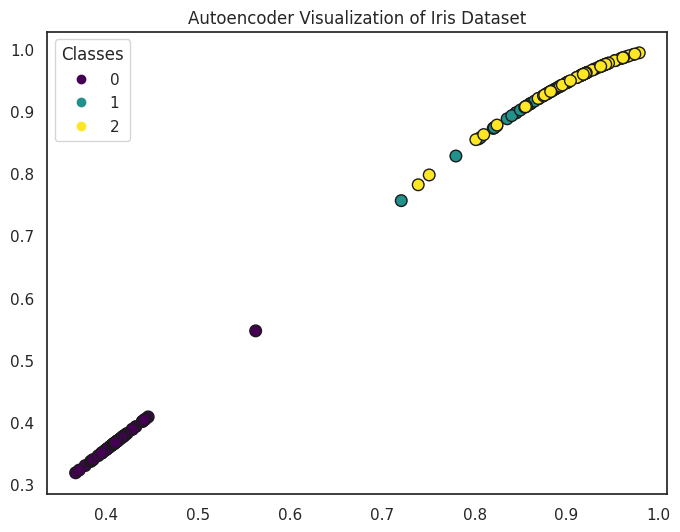

In [ ]:
# Normalizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_iris)

# Criando o modelo Autoencoder
model = Sequential([
    Dense(3, activation='relu', input_shape=(4,)),
    Dense(2, activation='relu'),
    Dense(3, activation='sigmoid')
])

# Compilando o modelo
model.compile(optimizer='adam', loss='mse')

# Treinando o Autoencoder
model.fit(X_scaled, y_iris_numeric, epochs=100, batch_size=32, verbose=0)

# Obtendo as representações latentes
encoded_X = model.predict(X_scaled)

# Plotando o resultado
plt.figure(figsize=(8, 6))
scatter = plt.scatter(encoded_X[:, 0], encoded_X[:, 1], c=y_iris_numeric, cmap='viridis', edgecolor='k', s=70)
plt.title('Autoencoder Visualization of Iris Dataset')
plt.legend(*scatter.legend_elements(), title='Classes')
plt.show()

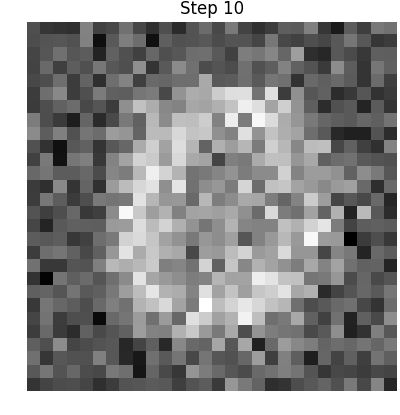

313/313 [==============================] - 1s 3ms/step


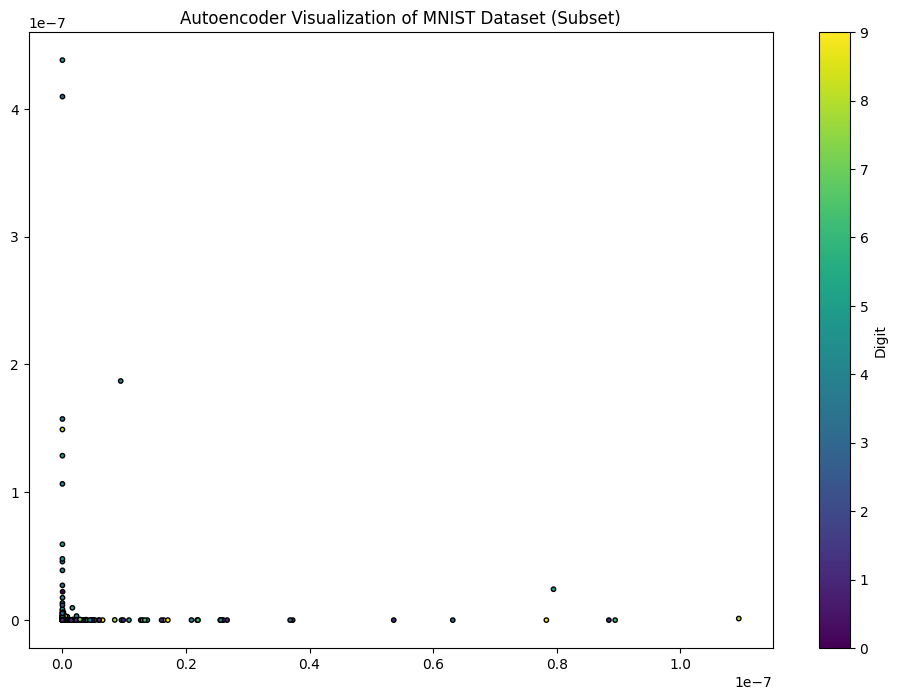

In [ ]:
# Normalizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_subset)

# Criando o modelo Autoencoder
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(784, activation='sigmoid')
])

# Compilando o modelo
model.compile(optimizer='adam', loss='mse')

# Treinando o Autoencoder
model.fit(X_scaled, X_scaled, epochs=120, batch_size=32, verbose=0)

# Obtendo as representações latentes
encoded_X = model.predict(X_scaled)

# Plotando o resultado
plt.figure(figsize=(12, 8))
scatter = plt.scatter(encoded_X[:, 0], encoded_X[:, 1], c=y_subset, cmap='viridis', edgecolor='k', s=10)
plt.title('Autoencoder Visualization of MNIST Dataset (Subset)')
plt.colorbar(scatter, label='Digit')
plt.show()

##**Quais são as principais motivações para reduzir a dimensionalidade de um conjunto de dados?**



**Eficiência Computacional:** Conjuntos de dados com muitas features consomem mais recursos computacionais. Reduzir a dimensionalidade pode tornar os algoritmos mais eficientes.

**Melhoria na Performance do Modelo:** Modelos podem sofrer de overfitting quando há muitas features, especialmente se essas features forem redundantes. A redução de dimensionalidade pode ajudar a mitigar esse problema e melhorar a generalização do modelo.

**Visualização:** Reduzir a dimensionalidade facilita a visualização dos dados em gráficos bidimensionais ou tridimensionais, o que é útil para compreender a distribuição dos dados e identificar padrões.

**Lidar com a Maldição da Dimensionalidade:** Em conjuntos de dados de alta dimensionalidade, o espaço de características torna-se vasto, o que pode levar a uma escassez relativa de dados. Reduzir a dimensionalidade ajuda a aliviar a maldição da dimensionalidade.

***#Exemplo em aplicações práticas:***

##Redução da complexidade de processamento

A **redução de dimensionalidade** pode ser usada para reduzir a complexidade de processamento de conjuntos de dados de alta dimensionalidade.

Por exemplo, um conjunto de dados de imagens médicas pode conter milhares de características que descrevem cada imagem.

A redução de dimensionalidade pode ser usada para reduzir o número de características para um número menor, o que pode acelerar o processamento das imagens.

# ***Aqui estão alguns exemplos específicos:***

***A redução de dimensionalidade pode ser usada para reduzir o número de características:***

- de áudio necessárias para o **reconhecimento de voz**.


- faciais necessárias para o **reconhecimento facial.**


- de mercado necessárias para a **análise de mercado.**

- médicas necessárias para o **diagnóstico médico.**

Isso pode tornar os processos mais rápidos, precisos e eficientes.

##**Quais são as principais desvantagens da redução de dimensionalidade?**

**Perda de Informação:** A redução de dimensionalidade envolve a remoção de características dos dados. Isso pode levar à perda de informações relevantes, o que pode prejudicar o desempenho de algoritmos de aprendizado de máquina.

**Complexidade na Escolha de Técnicas e Parâmetros:** A escolha da técnica de redução de dimensionalidade e seus parâmetros pode ser desafiadora. Diferentes técnicas podem se adequar melhor a diferentes conjuntos de dados, e ajustar parâmetros pode exigir conhecimento especializado.

**Interpretabilidade Reduzida:** Em conjuntos de dados de alta dimensionalidade, a interpretação dos resultados pode ser mais difícil. A interpretabilidade pode ser prejudicada quando os dados são projetados para um espaço de menor dimensão.

**Possível Aumento do Erro de Generalização:** Em alguns casos, a redução de dimensionalidade pode levar a um aumento no erro de generalização, especialmente se a escolha da técnica não for apropriada para o conjunto de dados em questão.

**Seleção de características enviesada:** Os algoritmos de redução de dimensionalidade podem ser enviesados na seleção de características. Isso pode levar a um viés nos resultados dos algoritmos de aprendizado de máquina.

***#Exemplo em aplicações práticas:***

##Redução da complexidade de processamento

A redução de dimensionalidade pode ser usada para reduzir o impacto da **maldição da dimensionalidade.**

Por exemplo, um conjunto de dados de clustering pode conter um número muito grande de características.

A redução de dimensionalidade pode ser usada para reduzir o número de características para um número menor, o que pode tornar mais fácil encontrar padrões nos dados.

##**Como avaliar o desempenho de um algoritmo de redução de dimensionalidade?**

O desempenho de algoritmos de redução de dimensionalidade pode ser avaliado de várias maneiras, incluindo:

**Acurácia de classificação:** A precisão de classificação de algoritmos de aprendizado de máquina treinados em conjuntos de dados reduzidos pode ser usada para avaliar o desempenho de algoritmos de redução de dimensionalidade.

**Retenção de informação:** A quantidade de informação retida nos dados reduzidos pode ser usada para avaliar o desempenho de algoritmos de redução de dimensionalidade.

**Complexidade de processamento:** A complexidade de processamento dos algoritmos de redução de dimensionalidade pode ser importante para aplicações em tempo real.

------------

A escolha da **métrica de avaliação** mais adequada depende do objetivo específico do uso da redução de dimensionalidade.

Por exemplo, se a principal preocupação é melhorar a **precisão** de algoritmos de aprendizado de máquina, a *acurácia* de classificação é a métrica mais importante.

Se a principal preocupação é **preservar** a informação nos dados reduzidos, a *retenção de informação* é a métrica mais importante.

Se a principal preocupação é o **desempenho** em tempo real, a *complexidade* de processamento é a métrica mais importante.

#**CONCLUSÃO**

A redução de dimensionalidade é uma ferramenta poderosa, mas a escolha do algoritmo certo é crucial. Depende do objetivo da redução, das características dos dados e das restrições de tempo e memória.

A variedade de algoritmos, como PCA, T-SNE, Autoencoders e LDA, oferece opções para diferentes necessidades, desde preservar a variância até identificar relações entre dados.

Avaliar o desempenho usando métricas como acurácia de classificação, retenção de informação e complexidade de processamento é essencial para selecionar o algoritmo mais adequado à tarefa específica.

Experimentar e comparar algoritmos pode levar a uma escolha mais informada e eficaz para alcançar os objetivos desejados.



#**FONTE**

https://www.escoladnc.com.br/blog/data-science/metodologia-crisp-dm/

https://blog.mbauspesalq.com/2022/04/12/crisp-dm-as-6-etapas-da-metodologia-do-futuro/

https://towardsdatascience.com/principal-component-analysis-pca-explained-visually-with-zero-math-1cbf392b9e7d

https://www.turing.com/kb/guide-to-principal-component-analysis

https://www.geeksforgeeks.org/dimensionality-reduction/

https://towardsdatascience.com/11-dimensionality-reduction-techniques-you-should-know-in-2021-dcb9500d388b

https://medium.com/analytics-vidhya/a-complete-guide-on-dimensionality-reduction-62d9698013d2

https://www.javatpoint.com/dimensionality-reduction-technique

https://medium.com/@vegi/visualizing-higher-dimensional-data-using-t-sne-on-tensorboard-7dbf22682cf2

https://www.datacamp.com/tutorial/introduction-t-sne

https://towardsdatascience.com/t-sne-python-example-1ded9953f26


https://www.deeplearningbook.com.br/introducao-aos-autoencoders/

https://youtu.be/eN0wFzBA4Sc?si=dkAaJtlgrKceGFF1